<a href="https://colab.research.google.com/github/nimapourjafar/cvt-pandas-workshop/blob/main/CVT_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python with Pandas!
Let's import a data set and use it as a pandas data frame!

We can call `head()` to get the first 5 elements of our data frame

In [ ]:
import pandas as pd
taxis = pd.read_csv("./sample_data/2019_Yellow_Taxi_Trip_Data.csv")
taxis.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


Let's drop some columns that we do not need. I'm going to use a REGEX expression to get rid of columns that contain `id` and the `store_and_fwd_flag`

In [ ]:
mask = taxis.columns.str.contains('id$|store_and_fwd_flag', regex=True)
columns_to_drop = taxis.columns[mask]
columns_to_drop

Index(['vendorid', 'ratecodeid', 'store_and_fwd_flag', 'pulocationid',
       'dolocationid'],
      dtype='object')

Our data frame doesn't include these columns now!

In [ ]:
taxis = taxis.drop(columns=columns_to_drop)
taxis.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


Let's also rename the pickup and dropoff columns for readability

In [ ]:
taxis.rename(
    columns={
        'tpep_pickup_datetime': 'pickup', 
        'tpep_dropoff_datetime': 'dropoff'
    },
    inplace=True
)

If we check the types of each column, we can see the pickup and drop off types aren't timestamps. We should change that.

In [ ]:
taxis.dtypes

pickup                    object
dropoff                   object
passenger_count            int64
trip_distance            float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

We can use `pd.to_datetime` to fix that

In [ ]:
taxis.loc[:, ['pickup', 'dropoff']] = \
    taxis.loc[:, ['pickup', 'dropoff']].apply(pd.to_datetime)
taxis.dtypes

pickup                   datetime64[ns]
dropoff                  datetime64[ns]
passenger_count                   int64
trip_distance                   float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

We can also add additional columns with the use of lambda functions. Lambda functions are a way to create anonymous quick functions that are easily disposable. We can create a lambda function and use our existing data as inputs.

In [ ]:
taxis = taxis.assign(
    elapsed_time=lambda x: x.dropoff - x.pickup, # 1
    cost_before_tip=lambda x: x.total_amount - x.tip_amount,
    tip_pct=lambda x: x.tip_amount / x.cost_before_tip, # 2
    fees=lambda x: x.cost_before_tip - x.fare_amount, # 3
    avg_speed=lambda x: x.trip_distance.div(
        x.elapsed_time.dt.total_seconds() / 3600
    ), # 4
    fare_rate=lambda x: x.trip_distance.div(x.fare_amount) #5
)
taxis.head()

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed,fare_rate
0,2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5,0 days 00:34:28,39.92,0.199900,10.42,13.804642,0.268814
1,2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0,0 days 00:13:18,12.30,0.000000,1.80,9.022556,0.190476
2,2019-10-23 16:08:44,2019-10-23 16:21:11,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5,0 days 00:12:27,13.80,0.144928,4.30,6.554217,0.143158
3,2019-10-23 16:22:44,2019-10-23 16:43:26,1,1.00,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5,0 days 00:20:42,17.30,0.249711,4.30,2.898551,0.076923
4,2019-10-23 16:45:11,2019-10-23 16:58:49,1,1.96,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5,0 days 00:13:38,14.80,0.033784,4.30,8.625917,0.186667


Currently, the index of our data is just an increment id (0,1,2...). Let's change that to the pickup time and sort our data according to date.

In [ ]:
taxis.set_index('pickup', inplace=True)
taxis.head()
taxis.sort_index(inplace=True)

It's very easy to plot your data with pandas too!

In [ ]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

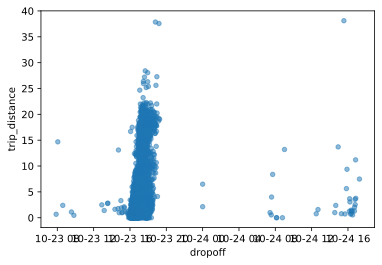

In [ ]:
taxis.plot(x="dropoff", y='trip_distance', kind = 'scatter',alpha=0.5)	